In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", index_col="PassengerId")

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("data/test.csv", index_col="PassengerId")

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Explore

In [4]:
import seaborn as sns
%matplotlib inline

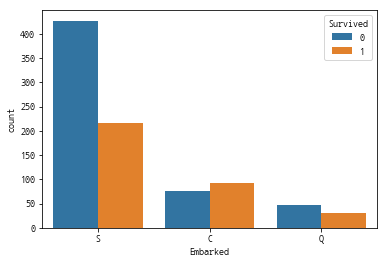

In [5]:
sns.countplot(data=train, x="Embarked", hue="Survived")

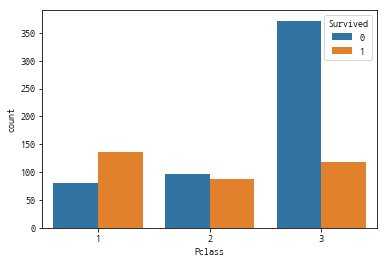

In [6]:
sns.countplot(data=train, x="Pclass", hue="Survived")

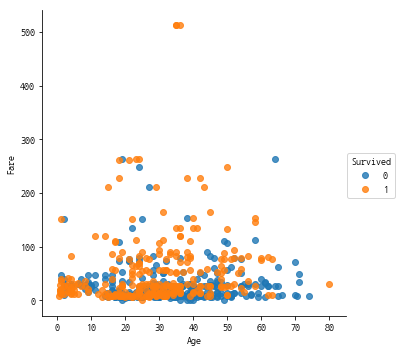

In [7]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

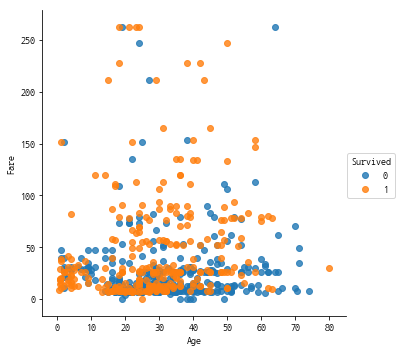

In [8]:
low_fare = train[train["Fare"] < 500]
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

## Preprocessing

### Encode Sex

In [9]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


### Fill in missing fare

In [11]:
# NaN(Not a Number), null
test.loc[test["Fare"].isnull(), "Fare"] = 0

test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


### Encode Embarked

In [12]:
# C == 0, S == 1, Q == 2
# 2 * S == Q?
# S + S == Q?

# One-hot Encoding
# C = [1, 0, 0]
# S = [0, 1, 0]
# Q = [0, 0, 1]

# 1 == True, 0 == False
# C = [True, False, False]
# S = [False, True, False]
# Q = [False, False, True]

train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [13]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 13)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


## Train

In [14]:
feature_names = ["Pclass", "Sex", "Fare",
                 "Embarked_C", "Embarked_S", "Embarked_Q"]
feature_names

['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

In [15]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0,7.2500,False,True,False
2,1,1,71.2833,True,False,False
3,3,1,7.9250,False,True,False
4,1,1,53.1000,False,True,False
5,3,0,8.0500,False,True,False


In [16]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
892,3,0,7.8292,False,False,True
893,3,1,7.0000,False,True,False
894,2,0,9.6875,False,False,True
895,3,0,8.6625,False,True,False
896,3,1,12.2875,False,True,False


In [17]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [18]:
# scikit-learn == sklearn
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Visualize

In [26]:
#!pip install gvmagic

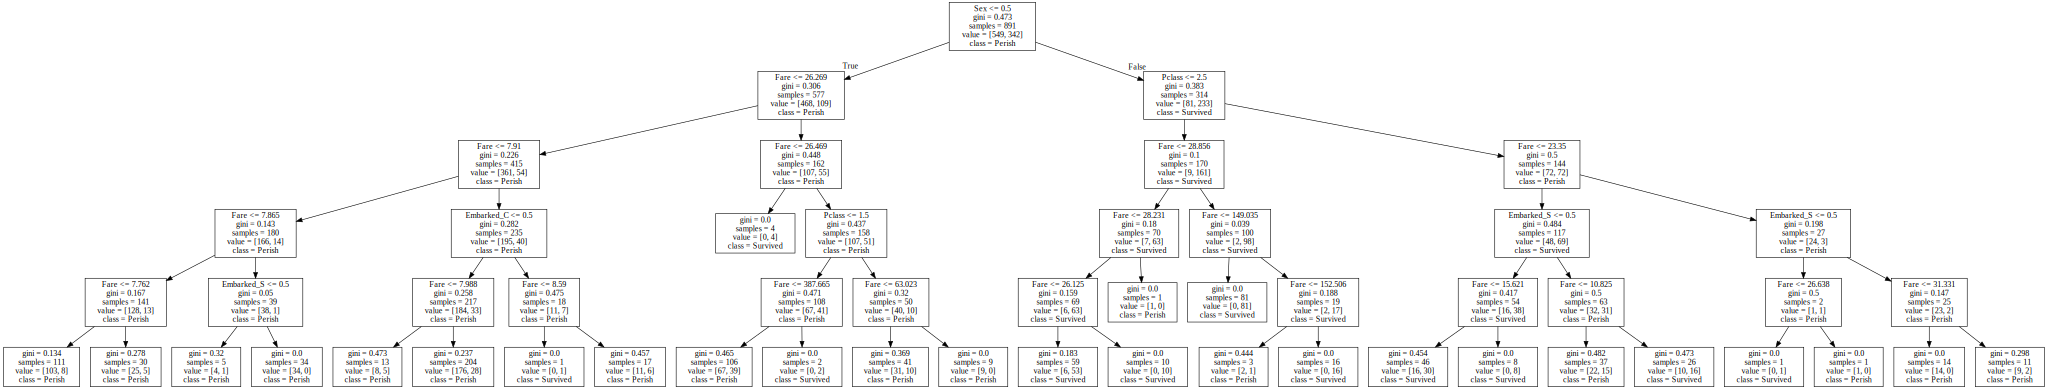

In [25]:
%load_ext gvmagic
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names=feature_names,
                           class_names=["Perish", "Survived"],
                           out_file=None)

%dotstr dot_tree

## Predict

In [21]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

## Submit

In [22]:
submit = pd.read_csv("data/gender_submission.csv", index_col="PassengerId")

submit["Survived"] = predictions

print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [23]:
submit.to_csv("decision-tree.csv")